# EDA for Chatbot Astrax

# Import Library

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer

try:
    from wordcloud import WordCloud
except:
    %pip install wordcloud
finally:
    from wordcloud import WordCloud

# Load Data

In [112]:
df = pd.read_csv("../data/hasil_scraping.csv")
df.head()

,Question,Answer
0,Penggunaan NPWP 16 Digit pada Aplikasi SAKTI d...,Soal sering ditanya terkait Penggunaan NPWP 16...
1,PMK-66 Tahun 2023 Terkait Natura,Link PDF: https://pajak.go.id/system/files/202...
2,PMK-72 Tahun 2023 Terkait Amortisasi,Link PDF: https://pajak.go.id/system/files/202...
3,Panduan Pemadanan NPWP Secara Langsung,Layanan pemadanan Nomor Pokok Wajib Pajak (NPW...
4,Penyampaian SPT Masa PPh Final dalam Rangka PPS,Link PDF: https://pajak.go.id/system/files/202...


# Analysis

## 1. Dataset Overview

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  153 non-null    object
 1   Answer    153 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [114]:
df.head(15)

,Question,Answer
0,Penggunaan NPWP 16 Digit pada Aplikasi SAKTI d...,Soal sering ditanya terkait Penggunaan NPWP 16...
1,PMK-66 Tahun 2023 Terkait Natura,Link PDF: https://pajak.go.id/system/files/202...
2,PMK-72 Tahun 2023 Terkait Amortisasi,Link PDF: https://pajak.go.id/system/files/202...
3,Panduan Pemadanan NPWP Secara Langsung,Layanan pemadanan Nomor Pokok Wajib Pajak (NPW...
4,Penyampaian SPT Masa PPh Final dalam Rangka PPS,Link PDF: https://pajak.go.id/system/files/202...
5,Sistem Terdampak ILAP NPWP 16 Digit,Link PDF: https://pajak.go.id/system/files/202...
6,Penataan Ulang Organisasi Instansi Vertikal Di...,"Informasi tentang ""Penataan Ulang Organisasi I..."
7,Penghentian Penyidikan Pasal 44B,"Informasi tentang ""Penghentian Penyidikan Pasa..."
8,Penanganan Kode Error E-Form,"Informasi tentang ""Penanganan Kode Error E-For..."
9,Penanganan Kode Error e-Filing,"Informasi tentang ""Penanganan Kode Error e-Fil..."


In [115]:
df.tail(15)

,Question,Answer
138,Kapan saya harus menggunakan aplikasi e-Faktur...,Penerbitan Faktur Pajak dengan menggunakan apl...
139,Apa keuntungan menggunakan e-Faktur sebagai Pe...,Bagi penjual:Dapat menikmati kemudahan antara ...
140,Apa latar belakang diluncurkannya e-Faktur?,Yang mendasari Direktorat Jenderal Pajak (DJP)...
141,Apa dasar hukum pembuatan e-Faktur?,Dasar hukum pembuatan e-Faktur sebagai berikut...
142,Apa pengertian Badan menurut ketentuan perpaja...,Badan adalah sekumpulan orang dan/atau modal y...
143,FAQ e-SPT Masa PPN 1107PUT,1. Bagaimana cara menginstal e-SPT PPN 1107PUT...
144,FAQ e-SPT Masa PPN 1111,"Jawaban untuk ""FAQ e-SPT Masa PPN 1111"" terlal..."
145,FAQ e-SPT Tahunan Badan Rupiah,"Jawaban untuk ""FAQ e-SPT Tahunan Badan Rupiah""..."
146,FAQ e-SPT Masa PPh Pasal 23/26,1. Versi terupdate e-SPT Masa PPh Pasal 23/26 ...
147,FAQ e-SPT Masa PPh Pasal 22,"Jawaban untuk ""FAQ e-SPT Masa PPh Pasal 22"" te..."


### Rows with non-standard Answers

In [ ]:
# Answer is "Tidak ada jawaban."
non_standard_mv = ["Tidak ada jawaban."]

no_answer_rows = df[df['Answer'].str.strip() == "Tidak ada jawaban."]
no_answer_rows[['Question', 'Answer']]

,Question,Answer
148,FAQ e-SPT Masa PPh Pasal 21-26 (PER-32/PJ/2009),Tidak ada jawaban.


In [17]:
# Answer contains "Jawaban untuk....."

non_standard_mv = ["Jawaban untuk "]
redirected_answer_rows = df[df['Answer'].str.contains('|'.join(non_standard_mv), case=False, na=False)]

redirected_answer_rows[['Question', 'Answer']]
print(f'\nThere are a total of {len(redirected_answer_rows)} QUESTIONS where the Answer contains "Jawaban untuk.....": \n')
for index, row in redirected_answer_rows.iterrows():
    print(f"Answer of Q#{index}: {row['Answer']}\n")


There are a total of 10 QUESTIONS where the Answer contains "Jawaban untuk.....": 

Answer of Q#11: Jawaban untuk "Panduan Penggunaan Aplikasi e-objection" terlalu panjang untuk ditampilkan. Silahkan baca langsung melalui link berikut: https://pajak.go.id/id/panduan-penggunaan-aplikasi-e-objection

Answer of Q#121: Jawaban untuk "Bagaimana pembuatan e-Faktur oleh Cabang yang telah dilakukan Pemusatan tempat terutang PPN?" terlalu panjang untuk ditampilkan. Silahkan baca langsung melalui link berikut: https://pajak.go.id/id/22-bagaimana-pembuatan-e-faktur-oleh-cabang-yang-telah-dilakukan-pemusatan-tempat-terutang-ppn

Answer of Q#133: Jawaban untuk "Apa persyaratan dan ketentuan yang berlaku untuk meminta Sertifikat Elektronik?" terlalu panjang untuk ditampilkan. Silahkan baca langsung melalui link berikut: https://pajak.go.id/id/10-apa-persyaratan-dan-ketentuan-yang-berlaku-untuk-meminta-sertifikat-elektronik

Answer of Q#137: Jawaban untuk "Dimana dan bagaimana cara memperoleh aplika

***SUMMARY***:

- The dataset contains **153 Q&A pairs**, with both `Question` and `Answer` fields are non-null and text-based, making them suitable for use in training RAG model.
- Initial inspection shows a mix of answer formats, including text descriptions and links to official documents or PDFs from pajak.go.id.

- One question has ***No Answer***. We might consider removing this due to the nature that chatbot won't be able to answer this and treat it as out-of-context question.
- Some of the answers are duplicating the question with prefix "Jawaban untuk {question} terlalu panjang untuk ditampilkan" before stating the answer. This might be unneccessary and create a non-friendly chatbot response for the users. Some further cleaning might be neccessary to provide a more friendly responses.

## 2. Basic Text Statistics

### Distribution of Question and Answer Lengths

In [118]:
df['question_len'] = df['Question'].apply(len)
df['answer_len'] = df['Answer'].apply(len)

q_stats = df['question_len'].describe().to_frame().rename(columns={'question_len': 'Question Length'})
a_stats = df['answer_len'].describe().to_frame().rename(columns={'answer_len': 'Answer Length'})

combined_stats = pd.concat([q_stats, a_stats], axis=1)
combined_stats

,Question Length,Answer Length
count,153.000000,153.000000
mean,83.450980,329.869281
std,51.751296,189.900032
min,13.000000,18.000000
25%,48.000000,192.000000
50%,69.000000,286.000000
75%,107.000000,415.000000
max,248.000000,940.000000


Questions tend to be concise, while answers range more broadly due to either short summaries or longer procedural instructions.

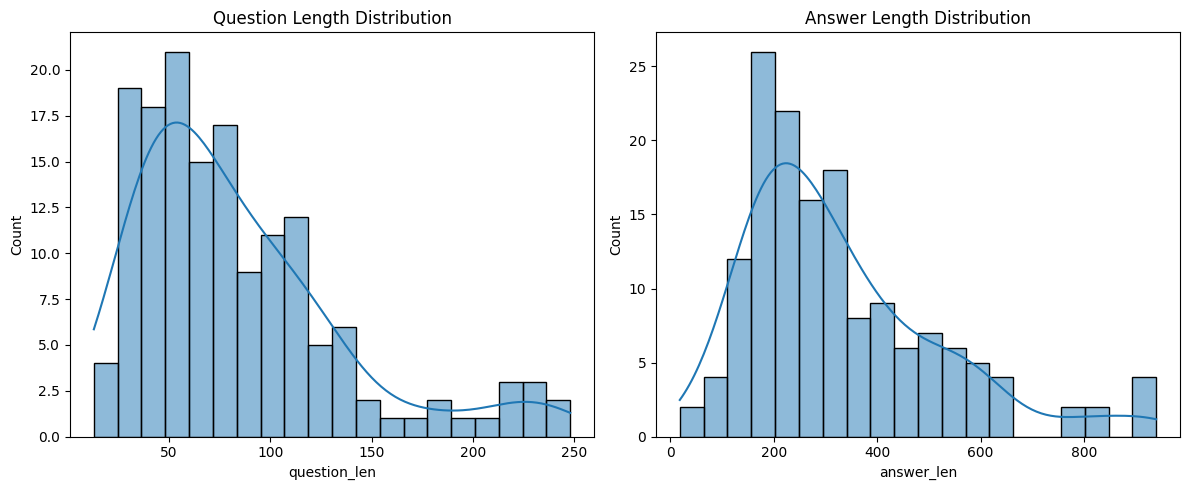

In [119]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['question_len'], bins=20, ax=axs[0], kde=True)
axs[0].set_title("Question Length Distribution")
sns.histplot(df['answer_len'], bins=20, ax=axs[1], kde=True)
axs[1].set_title("Answer Length Distribution")
plt.tight_layout()
plt.show()

***SUMMARY***:

Most questions are relatively short and focused, while answers are relatively longer and show more variability in length. This reflects real-life FAQ structure, where questions are concise and answers can be detailed or link-based.

The majority of questions fall below 150 characters (with majority being in the 50-60 chars). While majority of answers fall within the 100-200 characters length, showing a longer tail distribution. 

We can consider truncation or summarization strategies for very long answers when generating responses.

However, some of the questions might be too short and represents more a title of an intent/topic rather than a full questions. Let's see some example of questions with less than 30 characters

### Short questions with less than 30 characters

In [120]:
short_questions = df[df['question_len'] < 30]
print(f'Total = {len(short_questions)} questions')
short_questions[['Question', 'question_len']]

Total = 11 questions


,Question,question_len
8,Penanganan Kode Error E-Form,28
13,Laporan Pasca Amnesti Pajak,27
14,Pemeriksaan Bukti Permulaan,27
19,Batasan File Upload SPT,23
20,Amnesti Pajak,13
85,Input retur sebelum e-Faktur?,29
143,FAQ e-SPT Masa PPN 1107PUT,26
144,FAQ e-SPT Masa PPN 1111,23
147,FAQ e-SPT Masa PPh Pasal 22,27
150,FAQ e-SPT Masa PPh Pasal 15,27


These are example of 11 short questions that represents more of a broader FAQ topics instead of a question format. We might need to explore or augment further these types of questions

### Long answers questions with more than 600 characters

In [121]:
long_answers = df[df['answer_len'] > 600]
print(f"Total long answers more than 600 chars = {len(long_answers)} questions\n")
print("###########################")

for index, row in long_answers.iterrows():
    print(f"Q: {row['Question']}:\nA: {row['Answer']}\n")

Total long answers more than 600 chars = 13 questions

###########################
Q: Rasio Pajak (Tax Ratio) dari Masa ke Masa:
A: Berapa tingkat Rasio Pajak Indonesia dari tahun ke tahun?
Rasio Pajak adalah perbandingan penerimaan pajak terhadap produk domestik bruto. Rasio ini merupakan alut ukur untuk menilai kinerja penerimaan pajak suatu Negara. Komponen penerimaan pajak di Indonesia mencakup penerimaan pajak pusat, Penerimaan Negara Bukan Pajak (PNBP) Minyak dan Gas, dan PNBP Pertambangan Umum. Pajak daerah tidak menjadi komponen perhitungan Rasio Pajak. Berikut Formula Perhitungan Rasio Pajak mulai tahun 2010 sampai dengan tahun 2017 sebagaimana termuat dalam gambar.

Gambar: https://pajak.go.id/sites/default/files/inline-images/Rasio%20Pajak.jpg

Q: Apakah Wajib Pajak dapat mengajukan permohonan kembali jika permohonan sebelumnya dikembalikan?:
A: Jika permohonan sebelumnya dikembalikan, berlaku ketentuan:
1. apabila permohonan dikembalikan karena tidak memenuhi syarat Pasal 4

We can see that even if those answers might seem long, they're still in-context of answering the respective questions.

## 3. Duplicate Detection

In [122]:
duplicate_questions = df[df.duplicated('Question')]
duplicate_answers = df[df.duplicated('Answer')]

print(f"Duplicate questions: {len(duplicate_questions)}")
print(f"Duplicate answers: {len(duplicate_answers)}")

Duplicate questions: 0
Duplicate answers: 1


No duplicate questions exist, and only 1 duplicate answers, which would be considered normal for FAQ-based document. 
This indicates that the the dataset is diverse and clean—no major deduplication required.

Let's check in detail what question is this

In [123]:
duplicate_answers = df[df.duplicated('Answer', keep=False)]
duplicate_answers = duplicate_answers.sort_values('Answer')

print("Questions:")
print(duplicate_answers['Question'].unique())

print("\nDuplicated Answer:")
print(duplicate_answers['Answer'].unique())

Questions:
['Jika data e-Faktur hilang, apa yang harus dilakukan oleh PKP?'
 'Dalam keadaan tertentu, apakah PKP diperkenankan meminta database e-Faktur yang telah dibuat ke DJP?']

Duplicated Answer:
['Dalam hal Pengusaha Kena Pajak (PKP) mengalami kendala teknis yang menyebabkan data e-Faktur rusak atau hilang, PKP dapat mengajukan permintaan data e-Faktur terbatas pada data e-Faktur yang telah diunggah (upload) ke Direktorat Jenderal Pajak (DJP) melalui Kantor Pelayanan Pajak (KPP) tempat PKP dikukuhkan.']


The 2 questions are different and addresses different things, however, one can see why the answer might be addressing both questions. More follow-up inspection might be needed on this.

## 4. Keyword Frequency

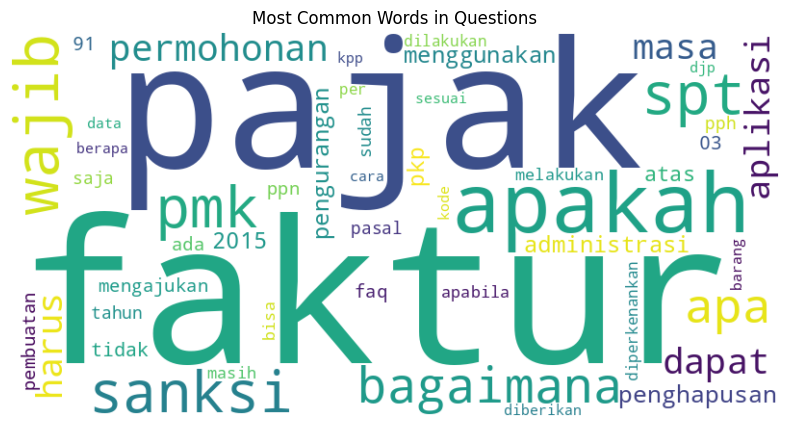

In [124]:
custom_stopwords = ['yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'dengan', 'pada', 'adalah', 'oleh', 'atau', 'jika', 'karena', 'akan', 'ini', 'itu', 'sebagai', 'dalam']

vectorizer = CountVectorizer(stop_words=custom_stopwords, max_features=50)
X = vectorizer.fit_transform(df['Question'])
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Questions")
plt.show()

The most common words in the FAQ document includes "faktur", "pajak", "apakah", "wajib", "bagaimana". This shows coherence with the main theme which is questions around taxation.

These could be used for tagging or intent classification if needed.


## 5. Link Presence in Answers

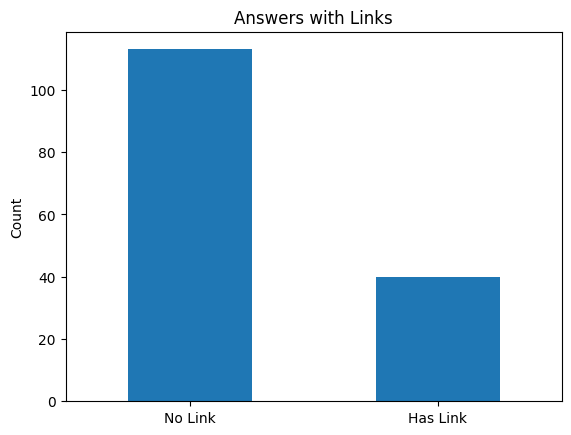

In [125]:
df['has_link'] = df['Answer'].apply(lambda x: bool(re.search(r'https?://', x)))
df['has_link'].value_counts().plot(kind='bar', title='Answers with Links')
plt.xticks(ticks=[0, 1], labels=['No Link', 'Has Link'], rotation=0)
plt.ylabel("Count")
plt.show()

Some number of answers contain links. These are mainly references to official documents. These links can be useful for chatbot to redirect users for a more complete answer.

## Recommendations

- **Preprocessing for LLM**: 
    - Normalize text (e.g., lowercasing, punctuation cleanup)
    - Consider shortening some of the answers, since their average word counts can be quite long. This ensures the chatbot responses remains concise. For longer answers, we can cite link or references.

- **Answer cleaning**:
    - One question have *"Tidak ada jawaban."* (no answer) as the answer. This can mislead the chatbot, and should probably be treated as out-of-context question.
    - Some of the answers are duplicating the question with prefix *"Jawaban untuk {question} terlalu panjang untuk ditampilkan"* before stating the answer. This might be unneccessary and create a non-friendly chatbot response for the users. Some further cleaning to the answers might be neccessary to provide a more friendly responses.
    - Most of the answers are written straight-to-the-point. We might want to add some more context before the answer to provide a more friendly tone to the chatbot.

- **Augmentation**: 
    - In the dataset, there are questions that are very short, and represents more a topic/intent rather than a question format, such as:
        - "Amnesti Pajak"
        - "FAQ e-SPT Masa PPN 1111"
        - "Penanganan Kode Error E-Form" 
    - Consider paraphrasing or adding context to improve training diversity

- **Multi-turn Dialogues**: 
    - Expand the dataset by simulating follow-up questions for long answers
